<a href="https://colab.research.google.com/github/kamillaknudsen/tmdl/blob/main/TMDL_2024_25_Lecture_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning
_Author: Satchit Chatterji (satchit.chatterji@gmail.com)_

## Lecture 3 -- Unsupervised Learning methods
> Today's question: **How do I understand unlabelled data points?**

This notebook is a guide into the most common and arguably most useful unsupervised learning algorithms.

*Note: More on K-Means can be found in the notebook from [Python for Data Science](https://github.com/satchitchatterji/PythonForDataScience/blob/main/lecture4/Tangent_K_means_clustering.ipynb).*

#### Notebook outline:
- Dataset MNIST
- PCA decomposition
- K-Means clustering
- Gaussian Mixture Models
- One Hot Encoding


In [ ]:
# import important libraries and dataset
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


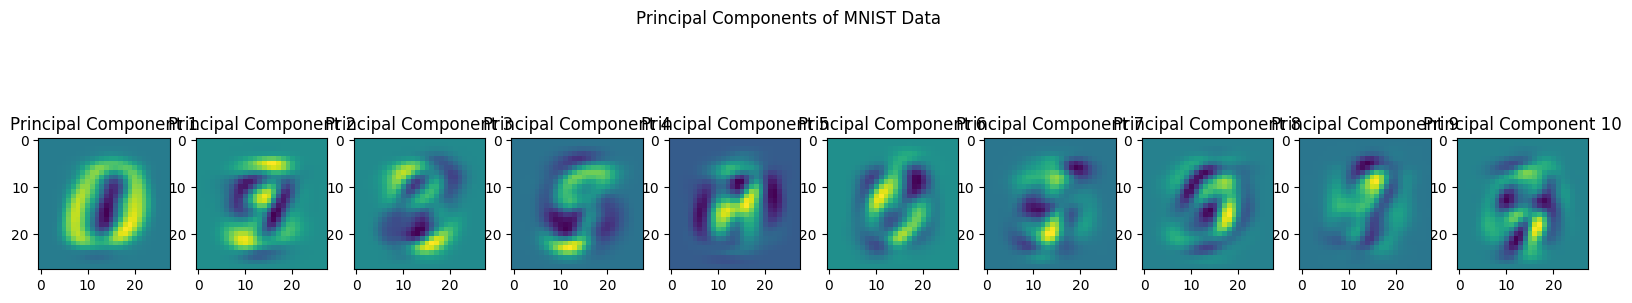

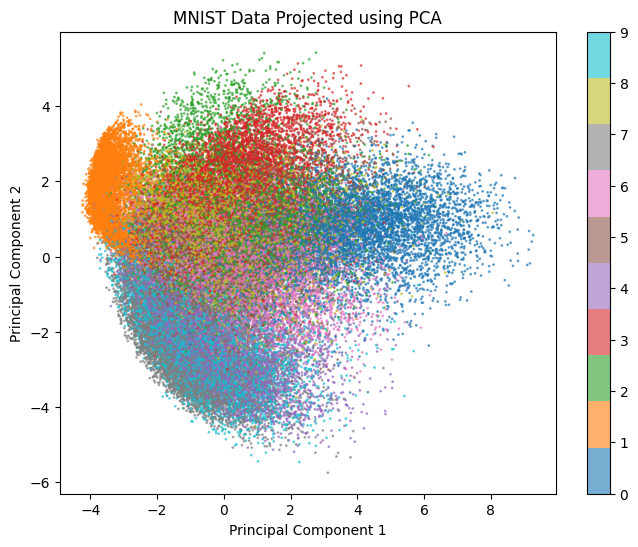

In [ ]:
# Load MNIST dataset: we saw this last week too!
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# Data preprocessing: reshape and normalize the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train / 255.
x_test = x_test / 255.

# Set up PCA object
pca = PCA(n_components=10)  # Set the desired number of components
# Perform covariance matrix computation and eigendecomposition,
# and project data to lower dimension
x_train_pca = pca.fit_transform(x_train)

# Plotting the principal components
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i, c in enumerate(pca.components_):
    pos = ax[i].imshow(c.reshape(28, 28))
    # plt.colorbar(pos)
    ax[i].set_title(f"Principal Component {i+1}")
plt.suptitle('Principal Components of MNIST Data')
plt.show()

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('MNIST Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

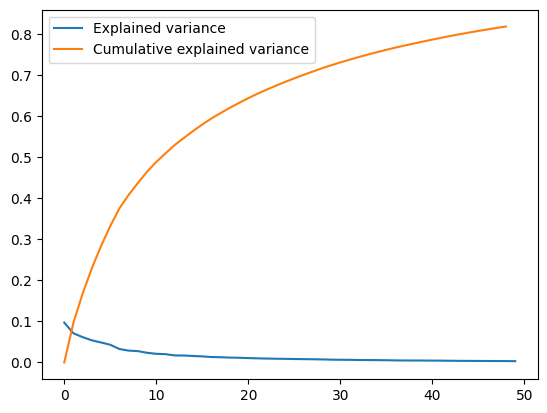

In [ ]:
pca = PCA(n_components=50)  # Set the desired number of components
# perform covariance matrix computation
# and eigendecomposition
x_train_pca = pca.fit_transform(x_train)
# print(pca.explained_variance_)

powers = pca.explained_variance_ratio_
# print(powers[:2])
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

# K-Means Clustering

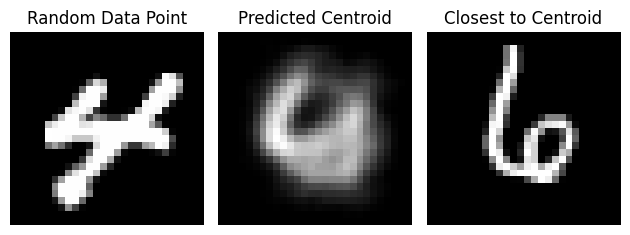

In [ ]:
# import KMeans class
from sklearn.cluster import KMeans

# Select a random subset of the dataset
random_subset = np.random.choice(len(x_train), size=2000, replace=False)
x_subset = x_train[random_subset]

# Perform K-means clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_subset)

# Randomly select a data point
random_index = np.random.randint(len(x_subset))
random_data_point = x_subset[random_index]

# Predict the cluster for the selected data point
predicted_cluster = kmeans.predict([random_data_point])

# Get the cluster center for the predicted cluster
predicted_center = kmeans.cluster_centers_[predicted_cluster]

# get the closest training point to the predicted center
closest_point_to_pred = np.argmin(kmeans.transform(x_subset)[:,predicted_cluster])

# Reshape the data point and the cluster center for visualization
random_data_point_img = random_data_point.reshape(28, 28)
predicted_center_img = predicted_center.reshape(28, 28)
closest_pred_img = x_subset[closest_point_to_pred].reshape(28, 28)

# Plot images
plt.subplot(1, 3, 1)
plt.imshow(random_data_point_img, cmap='gray')
plt.title('Random Data Point')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_center_img, cmap='gray')
plt.title('Predicted Centroid')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closest_pred_img, cmap='gray')
plt.title('Closest to Centroid')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plotting the centroids

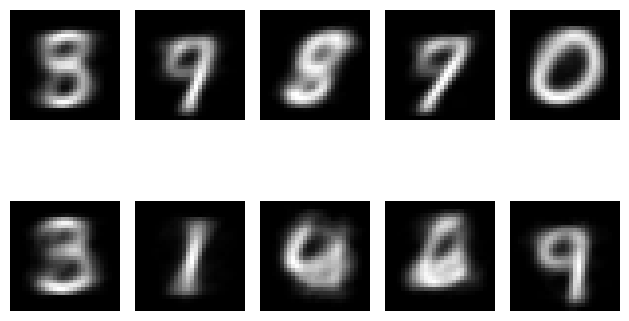

In [ ]:
fig, axs = plt.subplots(2,5)
axs = axs.flatten()

for i, center in enumerate(kmeans.cluster_centers_):
    axs[i].imshow(center.reshape(28,28),cmap="gray")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Evaluating the usefulness of the elbow method

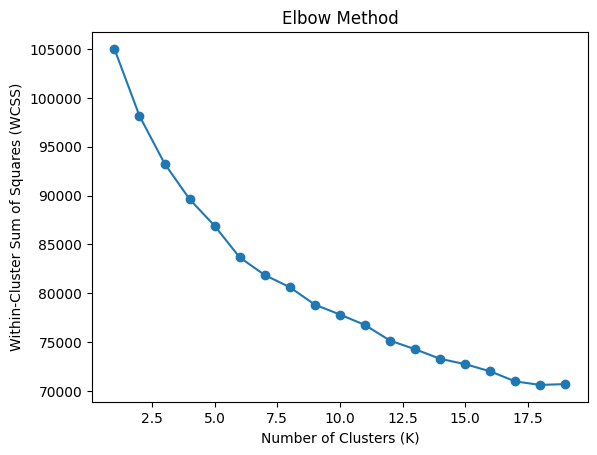

In [ ]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_subset)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Gaussian Mixture Models

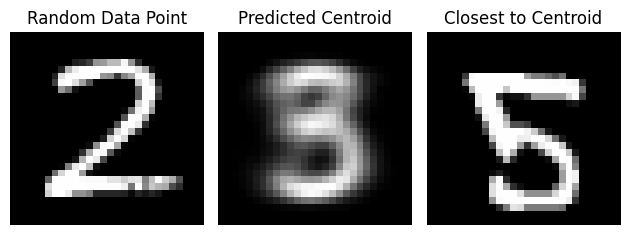

In [ ]:
# import GMM class
from sklearn.mixture import GaussianMixture

# Select a random subset of the dataset
random_subset = np.random.choice(len(x_train), size=2000, replace=False)
x_subset = x_train[random_subset]

# Perform K-means clustering
gmm = GaussianMixture(10)
gmm.fit(x_subset)

# Randomly select a data point
random_index = np.random.randint(len(x_subset))
random_data_point = x_subset[random_index]

# Predict the cluster for the selected data point
predicted_cluster = gmm.predict([random_data_point])

# Get the cluster center for the predicted cluster
predicted_center = gmm.means_[predicted_cluster]

# get the closest training point to the predicted center
closest_point_to_pred = np.argmax(gmm.predict_proba(x_subset)[:,predicted_cluster])

# Reshape the data point and the cluster center for visualization
random_data_point_img = random_data_point.reshape(28, 28)
predicted_center_img = predicted_center.reshape(28, 28)
closest_pred_img = x_subset[closest_point_to_pred].reshape(28, 28)

# Plot images
plt.subplot(1, 3, 1)
plt.imshow(random_data_point_img, cmap='gray')
plt.title('Random Data Point')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_center_img, cmap='gray')
plt.title('Predicted Centroid')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closest_pred_img, cmap='gray')
plt.title('Closest to Centroid')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plotting the centroids

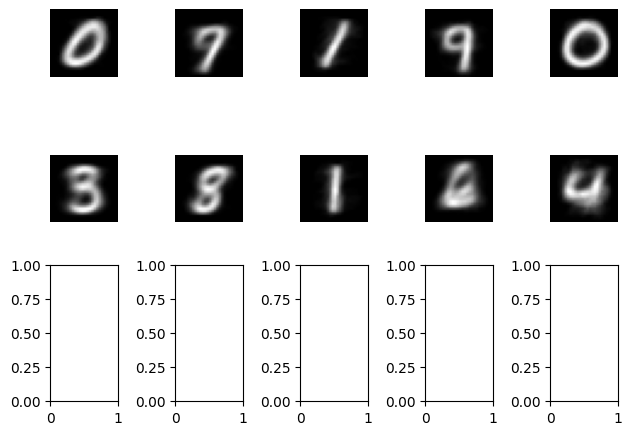

In [ ]:
fig, axs = plt.subplots(3,5)
axs = axs.flatten()

for i, center in enumerate(gmm.means_):
    axs[i].imshow(center.reshape(28,28),cmap="gray")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Generative models: A quick look

An explicit generative model models the PDF of the data directly. Sampling from these distributions will give us new, generated examples.

Generating random samples of class 1


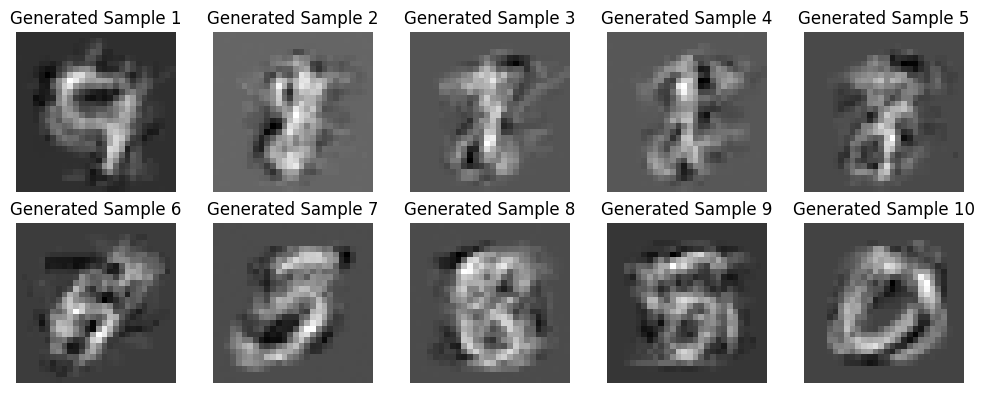

In [ ]:
# Select a random class from the training set
random_class = np.random.randint(0, 10)
print("Generating random samples of class", random_class)

# Filter the training set for samples of the random class
# class_samples = x_train[y_train == random_class]
class_samples = x_train[:1000]

# Create a Gaussian Mixture Model with 10 components
gmm = GaussianMixture(n_components=10, random_state=42)

# Fit the GMM to the class samples
gmm.fit(class_samples)

# Generate new samples from the fitted GMM
generated_samples = gmm.sample(10)[0]

# Reshape the generated samples for visualization
generated_samples_imgs = generated_samples.reshape(-1, 28, 28)

# Plot the generated samples
plt.figure(figsize=(10, 4))
for i in range(len(generated_samples)):
    plt.subplot(2, 5, i+1)
    plt.imshow(generated_samples_imgs[i], cmap='gray')
    plt.title('Generated Sample {}'.format(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()


##Introduction to NLP

Natural Language Processing (NLP) is a subfield of ML that enables machines to understand, interpret, and generate human language. Some common NLP tasks include:

- Tokenization: Splitting text into words or sentences.
- Stemming & Lemmatization: Reducing words to their root form.
- Stopword Removal: Eliminating commonly used words that don’t add much meaning (e.g., "is", "the").
- Vectorization: Converting text into numerical form for machine learning.

Below are some real-World Applications
- Chatbots and virtual assistants
- Sentiment analysis (e.g., analyzing customer reviews)
- Machine translation (e.g., Google Translate)
- Text summarization (e.g., news article summarization)



In this lecture we are going to learn basic text preprocessing techniques:
- Removing punctuation: Punctuation marks (e.g., !, ?, ,, ") do not usually add meaning to text analysis and should be removed.
- Converting text to lowercase: Converting text to lowercase ensures consistency


In [ ]:
# Removing Punctuation
import re

def remove_punctuation(text):
    """ Removes punctuation, keeping only letters, numbers, and spaces. """
    pattern = r'[^\w\s]'  # Matches anything that is NOT a word character or whitespace
    return re.sub(pattern, '', text)

sample_text = "Hello, World! This is an NLP example."
clean_text = remove_punctuation(sample_text)
print(clean_text)

#converting to lowercase
def to_lowercase(text):
    """ Converts text to lowercase """
    return text.lower()

text = "Natural Language Processing is AWESOME!"
print(to_lowercase(text))




Hello World This is an NLP example
natural language processing is awesome!


####removing stopwords:
Stopwords are common words (e.g., the, is, in, and, of, to) that do not add much meaning to text analysis. Removing stopwords reduces noise and improves model performance.

We will use the NLTK library to remove stopwords.

In [ ]:
#Removing stopwords

import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))  # Load stopwords
print(stop_words)

def remove_stopwords(text):
    """ Removes stopwords from text """
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

sample_text = "This is an example sentence to demonstrate stopword removal."
print(remove_stopwords(sample_text))

{'only', 'once', "doesn't", 'on', 'while', 'him', 'whom', 'were', 'hadn', 'during', 'you', "you'd", 'yours', 'that', 'up', 'an', 'can', 'so', 'haven', 'any', "she's", 'they', 'about', 'themselves', 'aren', 'wouldn', 'i', 'into', "you've", 'such', 'herself', "weren't", 'as', 'own', "isn't", 'should', 'few', 'what', 'couldn', 'very', 'his', 'yourselves', 'are', 'where', 'himself', 'them', 'no', 'too', 'we', 'those', 'how', 'hasn', 'all', 'their', 'between', 'll', 'before', 'she', 'itself', 'don', 'under', 'do', 'did', 'from', 'over', 'who', 'most', "couldn't", 'for', 'down', "shan't", "won't", "it's", 'out', 'hers', 'mightn', 'here', "should've", 'above', 'y', 'does', 'both', "don't", 'be', 'just', "you'll", "mightn't", 'theirs', 'a', 'now', "aren't", 'me', 'ain', "you're", 'myself', 'ours', 'shan', "wasn't", 'its', 'or', 'isn', 'then', 'your', 'nor', 'having', 'wasn', "mustn't", 'against', 'of', 'until', 'in', 'won', 'there', 'more', 'these', 'than', 'this', 'below', 'was', 'but', 'agai

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#One Hot Encoding
Technique to convert categorical variables into a binary (0s and 1s) vector representation.
- 1 indicates the presence of that category
- 0 indicates absence

e.g. classes = {‘cat’, ‘dog’, ‘mouse’, ‘horse’, ‘chicken’}.

If we have a dog: x = [0, 1, 0, 0, 0]ᵀ

If we have a chicken: x = [0, 0, 0, 0, 1]ᵀ




In [ ]:
unique_colors = ["Red", "Blue", "Green", "Yellow"]

def one_hot_encode(color, unique_colors):
  # Create a zero vector
    one_hot_vector = np.zeros(len(unique_colors))
    # Find the index of the color
    index = unique_colors.index(color)
    # Set the corresponding position to 1
    one_hot_vector[index] = 1
    return one_hot_vector


In [ ]:
color_to_encode = "Red"
encoded_vector = one_hot_encode(color_to_encode, unique_colors)

##Recommendation Engines
Recommendation engines are widely used to suggest relevant items based on user behavior, preferences, or item similarities. They are widely used in:

- Netflix & YouTube (movie/video recommendations)
- Amazon & eBay (product recommendations)
- Spotify & Apple Music (music recommendations)

Common Approaches in Recommender Systems
- Content-Based: Content-based filtering relies on the characteristics of items and user preferences to make recommendations. This approach assumes that if a user liked a particular item, they would likely enjoy items with similar attributes. For example, if a user frequently watches action movies, a content-based filtering system would recommend other action movies based on genre, actors, or director.

- Collaborative Filtering: Collaborative filtering is one of the most widely used approaches in recommendation systems. Instead of analyzing the content of items, this method focuses on user behavior and preferences. It works on the principle that users who have had similar preferences in the past are likely to have similar preferences in the future.


- Hybrid Approaches: Hybrid recommendation systems combine multiple approaches to leverage the strengths of each and mitigate their weaknesses. These systems often merge content-based and collaborative filtering techniques to provide more accurate and diverse recommendations.

Today we are going to learn about content based recommender system using Cosine similarity formula

Content-based recommendation relies on **item similarities** rather than user behavior.  
It analyzes the **features** of an item (e.g., text, numerical attributes) and recommends items that are **most similar** to a given one.



## Cosine Similarity

One effective way to measure similarity between items is **cosine similarity**, which is based on the angle between two feature vectors.

 **Cosine Similarity Formula**


$$sim(A, B)=\frac{A\cdot B}{||A||\cdot||B||}$$

Where:
- \( A \) and \( B \) are **feature vectors** representing two items.
- \( ||A|| \) and \( ||B|| \) are their **magnitudes (lengths)**.
- A similarity score **close to 1** means the items are very similar.

In [ ]:
import pandas as pd
# Sample dataset with books and their genre features
data = {
    "Book": [
        "The Da Vinci Code", "The Hobbit", "Pride and Prejudice", "Dune", "1984",
        "To Kill a Mockingbird", "The Catcher in the Rye", "Brave New World", "The Great Gatsby",
        "The Time Machine", "Foundation", "Harry Potter", "Sherlock Holmes", "War and Peace",
        "Dracula", "Frankenstein"
    ],
    "Fiction": [0.9, 0.95, 0.8, 0.7, 0.85, 0.95, 0.9, 0.88, 0.85, 0.75, 0.8, 0.9, 0.6, 0.7, 0.65, 0.7],
    "Mystery": [0.95, 0.2, 0.3, 0.4, 0.5, 0.6, 0.55, 0.45, 0.2, 0.3, 0.25, 0.3, 0.9, 0.5, 0.85, 0.7],
    "Romance": [0.2, 0.3, 0.95, 0.1, 0.1, 0.7, 0.6, 0.2, 0.9, 0.1, 0.15, 0.7, 0.3, 0.8, 0.4, 0.35],
    "Sci-Fi": [0.1, 0.2, 0.1, 0.95, 0.9, 0.2, 0.15, 0.85, 0.2, 0.95, 0.9, 0.6, 0.3, 0.1, 0.4, 0.5],
    "History": [0.4, 0.3, 0.2, 0.5, 0.7, 0.85, 0.65, 0.75, 0.4, 0.6, 0.55, 0.2, 0.5, 0.95, 0.3, 0.4]
}

df = pd.DataFrame(data)

df["features"] = df.apply(lambda row: np.array([row["Fiction"], row["Mystery"], row["Romance"], row["Sci-Fi"], row["History"]]), axis=1)

print(df[["Book", "features"]])

                      Book                       features
0        The Da Vinci Code     [0.9, 0.95, 0.2, 0.1, 0.4]
1               The Hobbit     [0.95, 0.2, 0.3, 0.2, 0.3]
2      Pride and Prejudice     [0.8, 0.3, 0.95, 0.1, 0.2]
3                     Dune     [0.7, 0.4, 0.1, 0.95, 0.5]
4                     1984     [0.85, 0.5, 0.1, 0.9, 0.7]
5    To Kill a Mockingbird    [0.95, 0.6, 0.7, 0.2, 0.85]
6   The Catcher in the Rye   [0.9, 0.55, 0.6, 0.15, 0.65]
7          Brave New World  [0.88, 0.45, 0.2, 0.85, 0.75]
8         The Great Gatsby     [0.85, 0.2, 0.9, 0.2, 0.4]
9         The Time Machine    [0.75, 0.3, 0.1, 0.95, 0.6]
10              Foundation   [0.8, 0.25, 0.15, 0.9, 0.55]
11            Harry Potter      [0.9, 0.3, 0.7, 0.6, 0.2]
12         Sherlock Holmes      [0.6, 0.9, 0.3, 0.3, 0.5]
13           War and Peace     [0.7, 0.5, 0.8, 0.1, 0.95]
14                 Dracula    [0.65, 0.85, 0.4, 0.4, 0.3]
15            Frankenstein     [0.7, 0.7, 0.35, 0.5, 0.4]


In [ ]:
import pandas as pd
def cosine_sim(v1, v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

prev_books = ["The Da Vinci Code", "Sherlock Holmes"]

# Get feature vectors of previously read books
prev_encodings = df[df["Book"].isin(prev_books)]["features"].tolist()

# Compute the average feature vector (preference profile) for multiple books
prev_watch_enc = np.mean(prev_encodings, axis=0)

cosine_sims = []
for i, row in df.iterrows():
    cosine_sims.append(cosine_sim(prev_watch_enc, row["features"]))

# Store similarities in the DataFrame
df["cosine_similarity"] = cosine_sims

# Sort books by similarity (higher is better)
df_sorted = df.sort_values(by="cosine_similarity", ascending=False)
df_sorted

,Book,Fiction,Mystery,Romance,Sci-Fi,History,features,cosine_similarity
0,The Da Vinci Code,0.90,0.95,0.20,0.10,0.40,"[0.9, 0.95, 0.2, 0.1, 0.4]",0.991025
12,Sherlock Holmes,0.60,0.90,0.30,0.30,0.50,"[0.6, 0.9, 0.3, 0.3, 0.5]",0.989207
14,Dracula,0.65,0.85,0.40,0.40,0.30,"[0.65, 0.85, 0.4, 0.4, 0.3]",0.970581
15,Frankenstein,0.70,0.70,0.35,0.50,0.40,"[0.7, 0.7, 0.35, 0.5, 0.4]",0.953926
6,The Catcher in the Rye,0.90,0.55,0.60,0.15,0.65,"[0.9, 0.55, 0.6, 0.15, 0.65]",0.911171
5,To Kill a Mockingbird,0.95,0.60,0.70,0.20,0.85,"[0.95, 0.6, 0.7, 0.2, 0.85]",0.895883
13,War and Peace,0.70,0.50,0.80,0.10,0.95,"[0.7, 0.5, 0.8, 0.1, 0.95]",0.822630
7,Brave New World,0.88,0.45,0.20,0.85,0.75,"[0.88, 0.45, 0.2, 0.85, 0.75]",0.820321
4,1984,0.85,0.50,0.10,0.90,0.70,"[0.85, 0.5, 0.1, 0.9, 0.7]",0.816867
1,The Hobbit,0.95,0.20,0.30,0.20,0.30,"[0.95, 0.2, 0.3, 0.2, 0.3]",0.810770
